[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/dhshah1112/CMPE258/blob/main/Assignment5/CMPE258_Assignment5_E.ipynb)


# Tensorflow various variants low level, api, functional, model, builtin

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

def generate_data(num_samples):
    x1 = np.random.uniform(-5, 5, size=num_samples)
    x2 = np.random.uniform(-5, 5, size=num_samples)
    x3 = np.random.uniform(-5, 5, size=num_samples)
    y = x1 ** 2 + x2 * x3 + np.sin(x1 * x2)
    return x1, x2, x3, y

num_samples = 1000
x1, x2, x3, y = generate_data(num_samples)
X = np.stack([x1, x2, x3], axis=1)

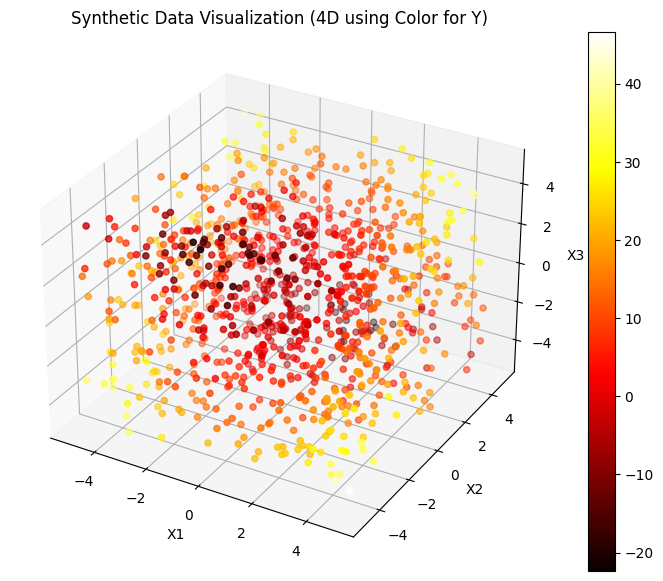

In [2]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
img = ax.scatter(x1, x2, x3, c=y, cmap=plt.hot())
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3')
fig.colorbar(img)
plt.title('Synthetic Data Visualization (4D using Color for Y)')
plt.show()

In [3]:
# Model parameters
input_size = 3
hidden_size = 64
output_size = 1
learning_rate = 0.001
epochs = 100

# Weight and bias initialization
W1 = tf.Variable(tf.random.normal([input_size, hidden_size]))
b1 = tf.Variable(tf.random.normal([hidden_size]))
W2 = tf.Variable(tf.random.normal([hidden_size, hidden_size]))
b2 = tf.Variable(tf.random.normal([hidden_size]))
W3 = tf.Variable(tf.random.normal([hidden_size, output_size]))
b3 = tf.Variable(tf.random.normal([output_size]))

def model(x):
    x = tf.einsum('ij,jk->ik', x, W1) + b1
    x = tf.nn.relu(x)
    x = tf.einsum('ij,jk->ik', x, W2) + b2
    x = tf.nn.relu(x)
    x = tf.einsum('ij,jk->ik', x, W3) + b3
    return x

def compute_loss(y_true, y_pred):
    return tf.reduce_mean(tf.square(y_true - y_pred))

optimizer = tf.optimizers.Adam(learning_rate)

# Training loop
for epoch in range(epochs):
    with tf.GradientTape() as tape:
        y_pred = model(X)
        loss = compute_loss(y, y_pred)
    gradients = tape.gradient(loss, [W1, b1, W2, b2, W3, b3])
    optimizer.apply_gradients(zip(gradients, [W1, b1, W2, b2, W3, b3]))

    if epoch % 10 == 0:
        print(f'Epoch {epoch}, Loss: {loss.numpy()}')

Epoch 0, Loss: 14711.7412109375
Epoch 10, Loss: 9604.9365234375
Epoch 20, Loss: 6126.97998046875
Epoch 30, Loss: 3974.75732421875
Epoch 40, Loss: 2703.504638671875
Epoch 50, Loss: 1958.5528564453125
Epoch 60, Loss: 1518.878662109375
Epoch 70, Loss: 1249.1038818359375
Epoch 80, Loss: 1065.689453125
Epoch 90, Loss: 927.5239868164062


In [4]:
# Reinitialize weights to restart training fresh for visualization purposes
W1.assign(tf.random.normal([input_size, hidden_size]))
b1.assign(tf.random.normal([hidden_size]))
W2.assign(tf.random.normal([hidden_size, hidden_size]))
b2.assign(tf.random.normal([hidden_size]))
W3.assign(tf.random.normal([hidden_size, output_size]))
b3.assign(tf.random.normal([output_size]))

losses = []  # To store the loss at each epoch

# Training loop with loss logging
for epoch in range(epochs):
    with tf.GradientTape() as tape:
        y_pred = model(X.astype(np.float32))
        loss = compute_loss(y.astype(np.float32), y_pred)
    gradients = tape.gradient(loss, [W1, b1, W2, b2, W3, b3])
    optimizer.apply_gradients(zip(gradients, [W1, b1, W2, b2, W3, b3]))
    losses.append(loss.numpy())  # Store the loss

    if epoch % 10 == 0:
        print(f'Epoch {epoch}, Loss: {loss.numpy()}')


Epoch 0, Loss: 24929.673828125
Epoch 10, Loss: 12146.5029296875
Epoch 20, Loss: 4227.67578125
Epoch 30, Loss: 2014.51416015625
Epoch 40, Loss: 1445.5355224609375
Epoch 50, Loss: 1042.9365234375
Epoch 60, Loss: 787.6806640625
Epoch 70, Loss: 664.8619995117188
Epoch 80, Loss: 591.9759521484375
Epoch 90, Loss: 535.1627807617188


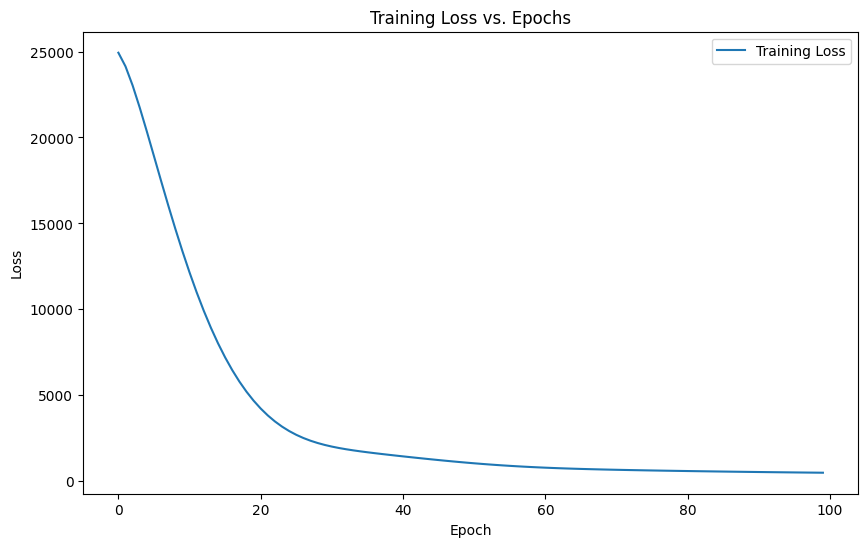

In [5]:
plt.figure(figsize=(10, 6))
plt.plot(losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss vs. Epochs')
plt.legend()
plt.show()


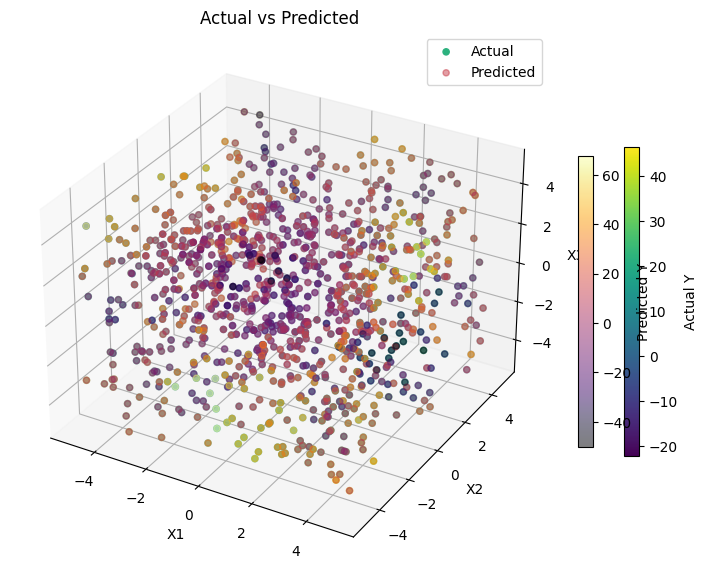

In [6]:
# Predicting the y values using the trained model
y_pred = model(X.astype(np.float32)).numpy()

# Plotting Actual vs Predicted
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
img1 = ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap='viridis', label='Actual')
img2 = ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y_pred.flatten(), cmap='inferno', alpha=0.5, label='Predicted')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3')
plt.title('Actual vs Predicted')
fig.colorbar(img1, ax=ax, fraction=0.02, pad=0.04, label='Actual Y')
fig.colorbar(img2, ax=ax, fraction=0.02, pad=0.04, label='Predicted Y')
plt.legend()
plt.show()

# tensorflow only from scratch not using high level api  of the same

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf


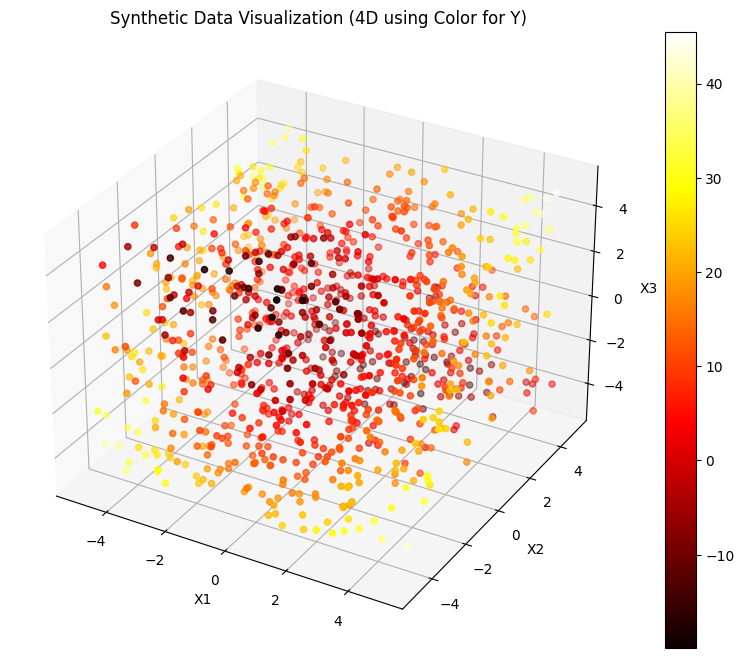

In [8]:
def generate_data(num_samples):
    x1 = np.random.uniform(-5, 5, num_samples)
    x2 = np.random.uniform(-5, 5, num_samples)
    x3 = np.random.uniform(-5, 5, num_samples)
    y = x1**2 + x2 * x3 + np.sin(x1 * x2)
    return np.stack([x1, x2, x3], axis=1), y

X, y = generate_data(1000)

# Plotting the synthetic data
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
p = ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.hot())
fig.colorbar(p)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3')
plt.title('Synthetic Data Visualization (4D using Color for Y)')
plt.show()


In [9]:
class MyNeuralNetwork:
    def __init__(self):
        # Initialize weights and biases
        self.W1 = tf.Variable(tf.random.normal([3, 64], stddev=0.1))
        self.b1 = tf.Variable(tf.zeros([64]))
        self.W2 = tf.Variable(tf.random.normal([64, 64], stddev=0.1))
        self.b2 = tf.Variable(tf.zeros([64]))
        self.W3 = tf.Variable(tf.random.normal([64, 1], stddev=0.1))
        self.b3 = tf.Variable(tf.zeros([1]))

    def forward(self, X):
        X = tf.einsum('ij,jk->ik', X, self.W1) + self.b1
        X = tf.nn.relu(X)
        X = tf.einsum('ij,jk->ik', X, self.W2) + self.b2
        X = tf.nn.relu(X)
        X = tf.einsum('ij,jk->ik', X, self.W3) + self.b3
        return X

def loss(y_pred, y_true):
    return tf.reduce_mean((y_pred - y_true) ** 2)

def train_step(model, X, y, learning_rate=0.001):
    with tf.GradientTape() as tape:
        y_pred = model.forward(X)
        loss_value = loss(y_pred, y)
    gradients = tape.gradient(loss_value, [model.W1, model.b1, model.W2, model.b2, model.W3, model.b3])
    for g, v in zip(gradients, [model.W1, model.b1, model.W2, model.b2, model.W3, model.b3]):
        v.assign_sub(g * learning_rate)
    return loss_value


In [10]:
model = MyNeuralNetwork()
epochs = 1000
losses = []

for epoch in range(epochs):
    epoch_loss = train_step(model, X.astype(np.float32), y.astype(np.float32).reshape(-1, 1))
    losses.append(epoch_loss)
    if epoch % 100 == 0:
        print(f'Epoch {epoch}, Loss: {epoch_loss.numpy()}')


Epoch 0, Loss: 208.890625
Epoch 100, Loss: 35.63446044921875
Epoch 200, Loss: 10.76137924194336
Epoch 300, Loss: 6.19518518447876
Epoch 400, Loss: 4.788913249969482
Epoch 500, Loss: 4.207982063293457
Epoch 600, Loss: 3.9027912616729736
Epoch 700, Loss: 3.7066547870635986
Epoch 800, Loss: 3.5605034828186035
Epoch 900, Loss: 3.4394893646240234


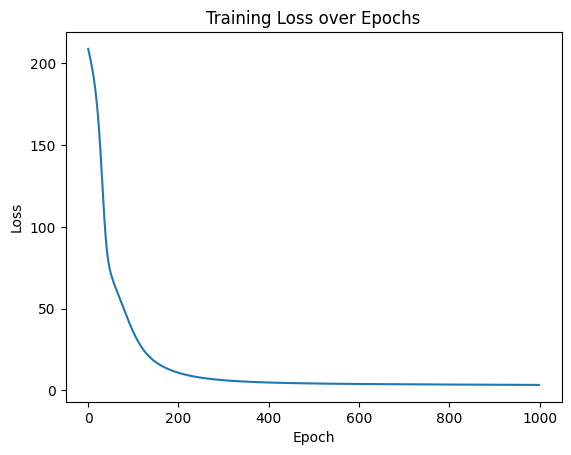

In [11]:
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.show()

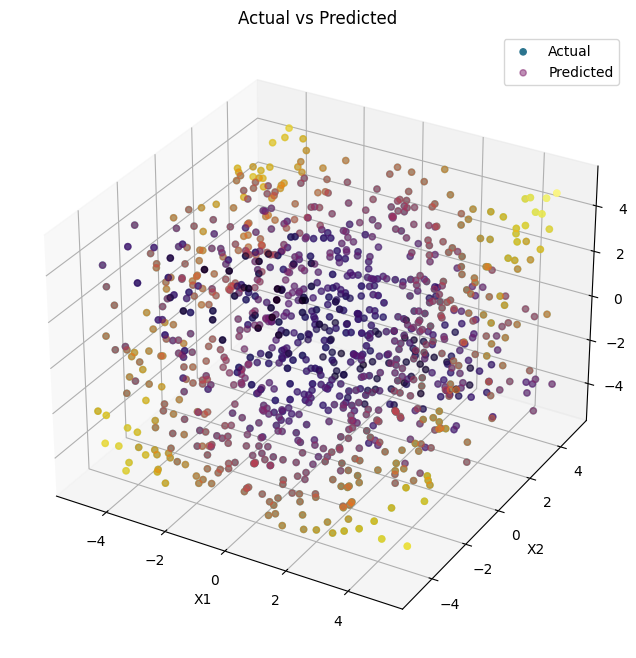

In [12]:
y_pred = model.forward(X.astype(np.float32)).numpy().flatten()

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap='viridis', label='Actual')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y_pred, cmap='inferno', alpha=0.5, label='Predicted')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()

# Write a colab tensorflow only with builtin layers of the same

In [13]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models


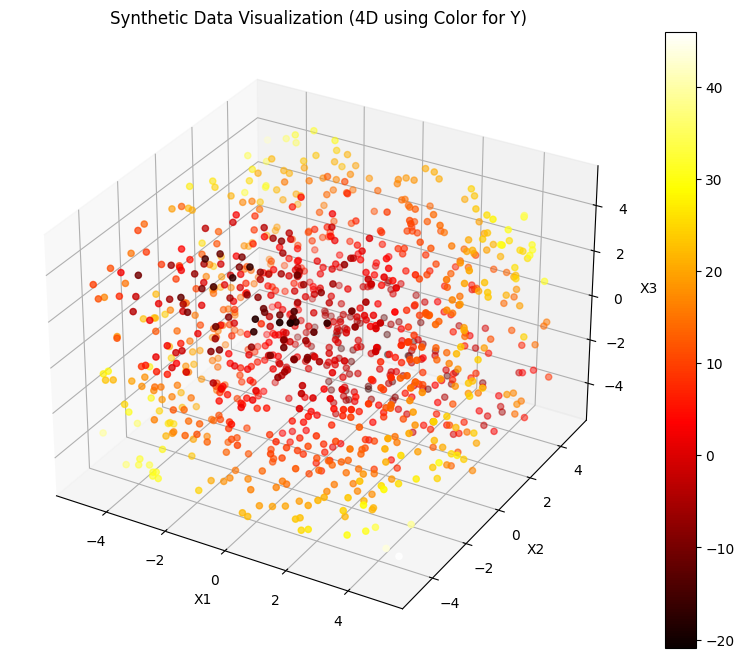

In [14]:
def generate_data(num_samples):
    x1 = np.random.uniform(-5, 5, num_samples)
    x2 = np.random.uniform(-5, 5, num_samples)
    x3 = np.random.uniform(-5, 5, num_samples)
    y = x1**2 + x2 * x3 + np.sin(x1 * x2)
    return np.stack([x1, x2, x3], axis=1), y

X, y = generate_data(1000)

# Plotting the synthetic data
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
p = ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.hot())
fig.colorbar(p)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3')
plt.title('Synthetic Data Visualization (4D using Color for Y)')
plt.show()


In [15]:
class EinsumLayer(layers.Layer):
    def __init__(self, output_dim, **kwargs):
        super(EinsumLayer, self).__init__(**kwargs)
        self.output_dim = output_dim

    def build(self, input_shape):
        # Create a trainable weight variable for this layer.
        self.kernel = self.add_weight(name='kernel',
                                      shape=(input_shape[1], self.output_dim),
                                      initializer='uniform',
                                      trainable=True)
        super(EinsumLayer, self).build(input_shape)

    def call(self, x):
        # Implementing the layer logic using einsum for matrix multiplication
        return tf.einsum('ij,jk->ik', x, self.kernel)


In [16]:
model = models.Sequential([
    EinsumLayer(64, input_shape=(3,)),
    layers.Activation('relu'),
    EinsumLayer(64),
    layers.Activation('relu'),
    EinsumLayer(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

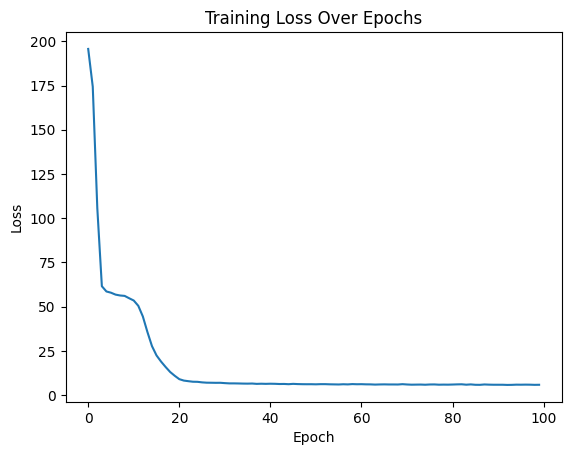

In [17]:
history = model.fit(X, y, epochs=100, batch_size=32, verbose=0)

plt.plot(history.history['loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.show()

32/32 [==============================] - 0s 3ms/step


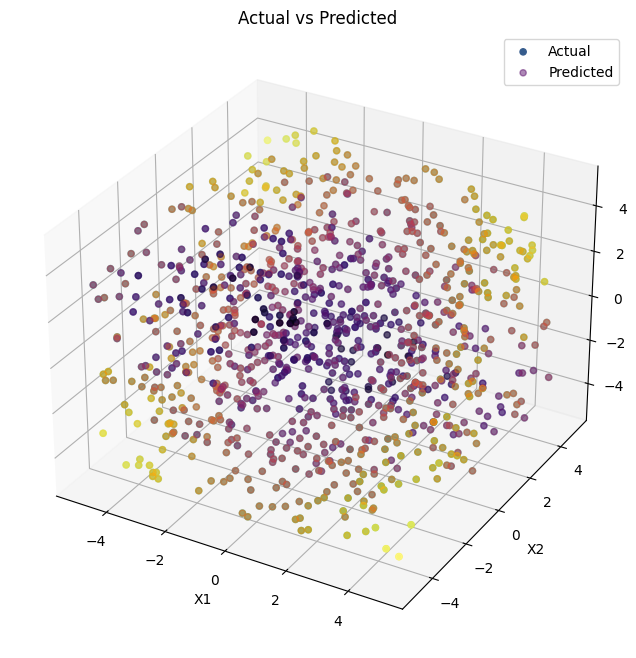

In [18]:
y_pred = model.predict(X)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap='viridis', label='Actual')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y_pred.flatten(), cmap='inferno', alpha=0.5, label='Predicted')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()


# Write a colab with Use functional api high level api  of tensorflow for the same

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import Input, Model
from tensorflow.keras.layers import Layer, Activation


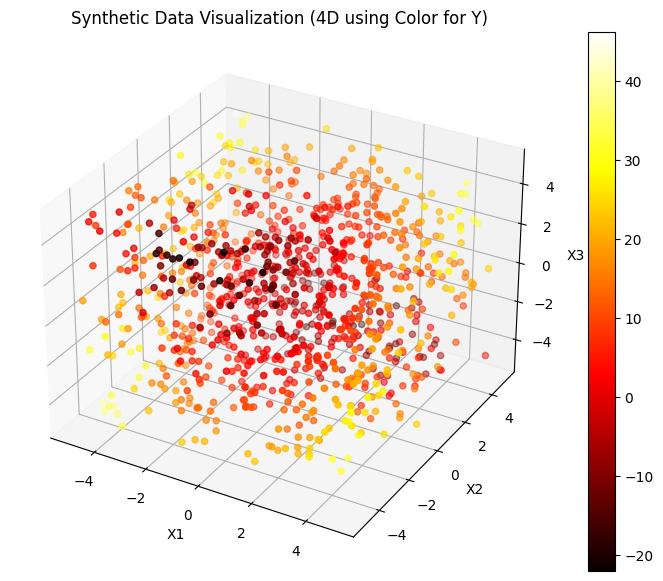

In [20]:
def generate_data(num_samples):
    x1 = np.random.uniform(-5, 5, num_samples)
    x2 = np.random.uniform(-5, 5, num_samples)
    x3 = np.random.uniform(-5, 5, num_samples)
    y = x1 ** 2 + x2 * x3 + np.sin(x1 * x2)
    return np.stack([x1, x2, x3], axis=1), y

X, y = generate_data(1000)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
img = ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap='hot')
fig.colorbar(img)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3')
plt.title('Synthetic Data Visualization (4D using Color for Y)')
plt.show()

In [21]:
class EinsumDense(Layer):
    def __init__(self, units=32, activation=None, **kwargs):
        super(EinsumDense, self).__init__(**kwargs)
        self.units = units
        self.activation = Activation(activation) if activation else None

    def build(self, input_shape):
        self.w = self.add_weight(shape=(input_shape[-1], self.units),
                                 initializer='random_normal',
                                 trainable=True)
        self.b = self.add_weight(shape=(self.units,),
                                 initializer='zeros',
                                 trainable=True)
        super().build(input_shape)

    def call(self, inputs):
        z = tf.einsum('ij,jk->ik', inputs, self.w) + self.b
        return self.activation(z) if self.activation else z


In [22]:
inputs = Input(shape=(3,))
x = EinsumDense(64, activation='relu')(inputs)
x = EinsumDense(64, activation='relu')(x)
outputs = EinsumDense(1)(x)

model = Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss='mse')


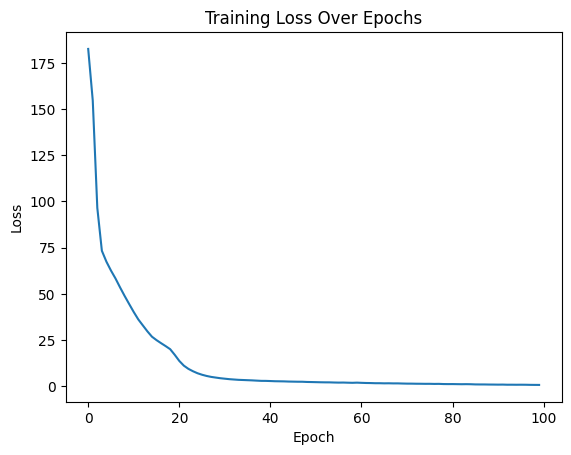

In [23]:
history = model.fit(X, y, epochs=100, batch_size=32, verbose=0)

plt.plot(history.history['loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.show()


32/32 [==============================] - 0s 5ms/step


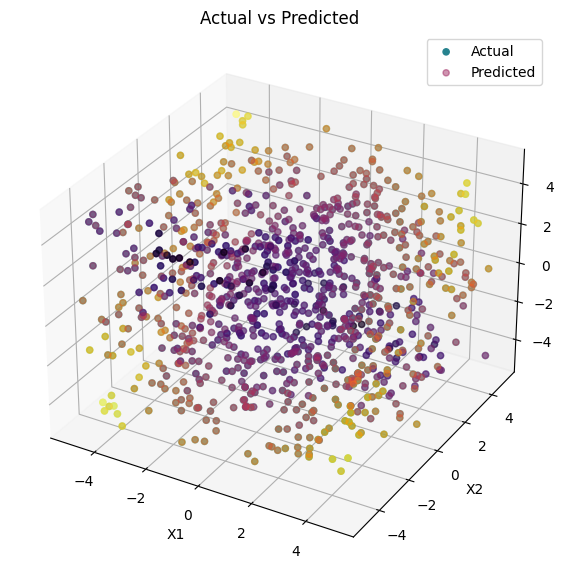

In [24]:
y_pred = model.predict(X)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap='viridis', label='Actual')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y_pred.flatten(), cmap='inferno', alpha=0.5, label='Predicted')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()


# Write a colab with tensorflow only but using high level api

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Layer


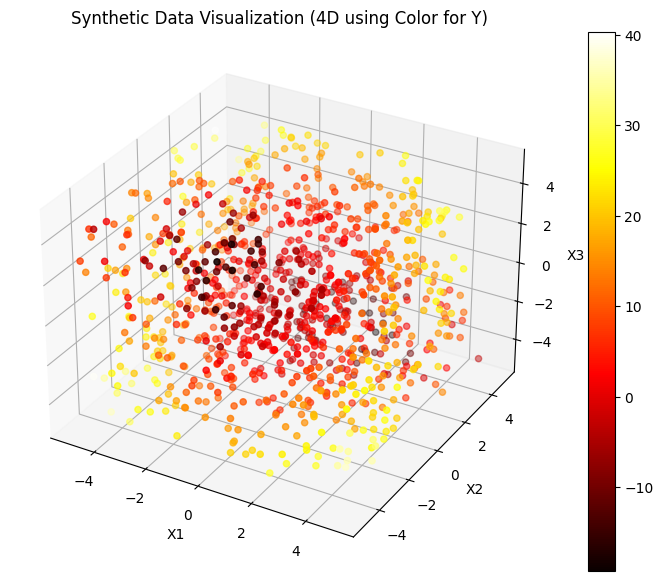

In [26]:
def generate_data(num_samples):
    x1 = np.random.uniform(-5, 5, num_samples)
    x2 = np.random.uniform(-5, 5, num_samples)
    x3 = np.random.uniform(-5, 5, num_samples)
    y = x1 ** 2 + x2 * x3 + np.sin(x1 * x2)
    return np.stack([x1, x2, x3], axis=1), y

X, y = generate_data(1000)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
img = ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap='hot')
fig.colorbar(img)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3')
plt.title('Synthetic Data Visualization (4D using Color for Y)')
plt.show()


In [27]:
class EinsumDense(Layer):
    def __init__(self, units, activation=None, **kwargs):
        super(EinsumDense, self).__init__(**kwargs)
        self.units = units
        self.activation = tf.keras.activations.get(activation)

    def build(self, input_shape):
        self.w = self.add_weight(shape=(input_shape[-1], self.units),
                                 initializer='random_normal',
                                 trainable=True)
        self.b = self.add_weight(shape=(self.units,),
                                 initializer='zeros',
                                 trainable=True)

    def call(self, inputs):
        return self.activation(tf.einsum('ij,jk->ik', inputs, self.w) + self.b)


In [28]:
model = Sequential([
    EinsumDense(64, activation='relu', input_shape=(3,)),
    EinsumDense(64, activation='relu'),
    EinsumDense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')


Epoch 1/100
32/32 [==============================] - 2s 6ms/step - loss: 176.3871
Epoch 2/100
32/32 [==============================] - 0s 5ms/step - loss: 147.9309
Epoch 3/100
32/32 [==============================] - 0s 4ms/step - loss: 88.6630
Epoch 4/100
32/32 [==============================] - 0s 4ms/step - loss: 67.2698
Epoch 5/100
32/32 [==============================] - 0s 5ms/step - loss: 58.7084
Epoch 6/100
32/32 [==============================] - 0s 6ms/step - loss: 50.3012
Epoch 7/100
32/32 [==============================] - 0s 5ms/step - loss: 41.3408
Epoch 8/100
32/32 [==============================] - 0s 5ms/step - loss: 32.3262
Epoch 9/100
32/32 [==============================] - 0s 4ms/step - loss: 24.2663
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 17.7472
Epoch 11/100
32/32 [==============================] - 0s 4ms/step - loss: 13.9015
Epoch 12/100
32/32 [==============================] - 0s 6ms/step - loss: 11.1091
Epoch 13/100
32/32 [===

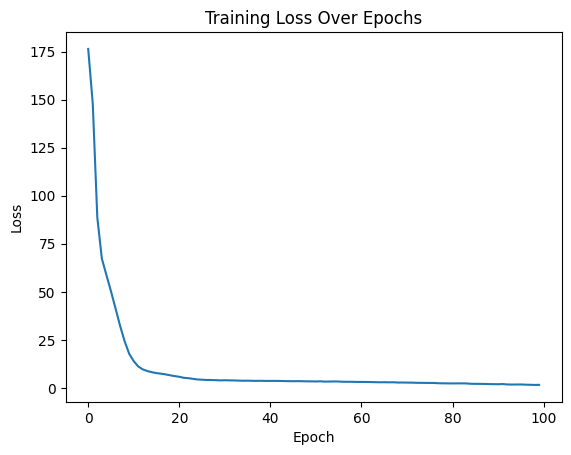

In [29]:
history = model.fit(X, y, epochs=100, batch_size=32, verbose=1)

plt.plot(history.history['loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.show()


32/32 [==============================] - 0s 3ms/step


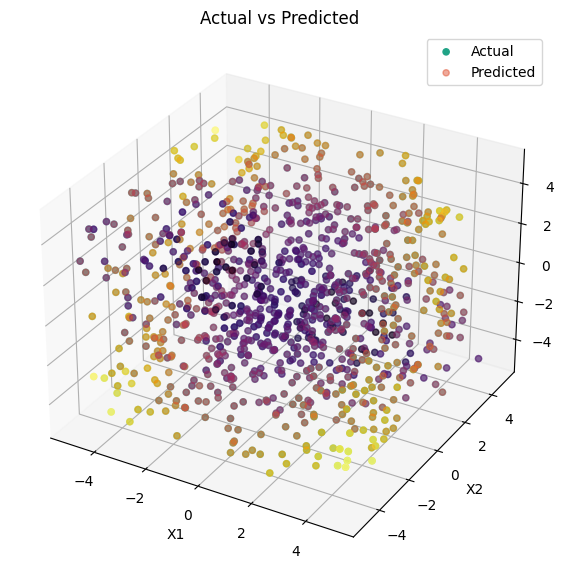

In [30]:
y_pred = model.predict(X)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap='viridis', label='Actual')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y_pred.flatten(), cmap='inferno', alpha=0.5, label='Predicted')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()
